# Honey Production
___

The Honey Production dataset contains information on honey production in the United States from 1998 to 2012. It was published by the National Agricultural Statistics Service (NASS) of the U.S. Department of Agriculture. More information can be found about it [here](https://www.kaggle.com/jessicali9530/honey-production).

The dataset contains 8 columns:
* **State** - The name of the state.
* **numcol** - The number of honey producing colonies.
* **yieldpercol** - The amount of honey produced per colony in pounds.
* **totalprod** - The total amount of honey produced that year.
* **stocks** - Stocks held by producers.
* **priceperlb** - Price per pound of honey, in USD.
* **prodvalue** - totalprod * priceperlb
* **year** - The year the data was recorded.

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [3]:
df = pd.read_csv("honeyproduction.csv")

In [12]:
df.shape

(626, 8)

In [13]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [17]:
df.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [ ]:
['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'year']

In [14]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [18]:
df.isnull().values.any()

False

# Data Exploration

Let's take a look at how some of the variables are distributed.

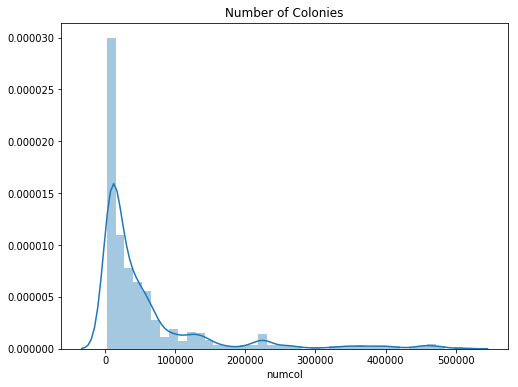

In [20]:
plt.figure(figsize=(8,6))

sns.distplot(df['numcol'])
plt.title('Number of Colonies')

plt.show()

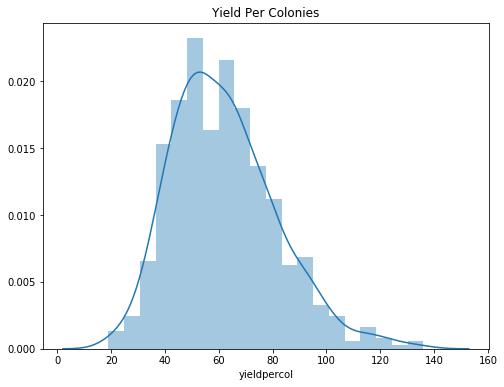

In [23]:
plt.figure(figsize=(8,6))

sns.distplot(df['yieldpercol'])
plt.title('Yield Per Colonies')

plt.show()

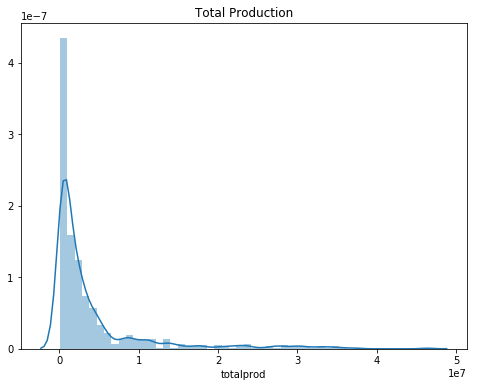

In [24]:
plt.figure(figsize=(8,6))

sns.distplot(df['totalprod'])
plt.title('Total Production')

plt.show()

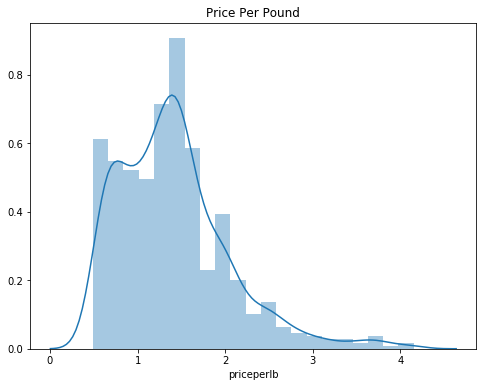

In [26]:
plt.figure(figsize=(8,6))

sns.distplot(df['priceperlb'])
plt.title('Price Per Pound')

plt.show()

#### Let's see how some of the variables have changed over time.

In [10]:
df_by_year = df.groupby('year').mean()
df_by_year25 = df.groupby('year').quantile(.25)
df_by_year75 = df.groupby('year').quantile(.75)
df_by_year50 = df.groupby('year').quantile(.5)

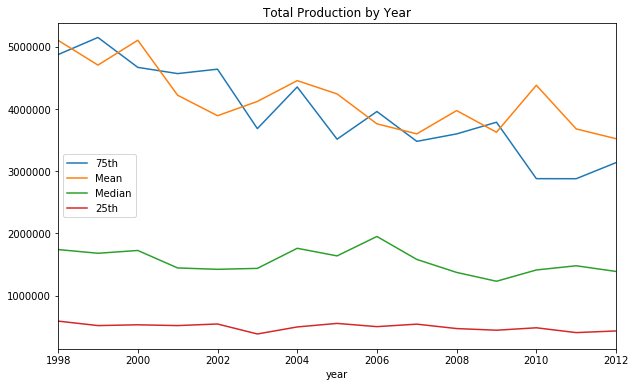

In [108]:
plt.figure(figsize=(10,6))
df_by_year75['totalprod'].plot()
df_by_year['totalprod'].plot()
df_by_year50['totalprod'].plot()
df_by_year25['totalprod'].plot()


plt.title('Total Production by Year')
plt.legend(['75th', 'Mean', 'Median', '25th'])

plt.show()

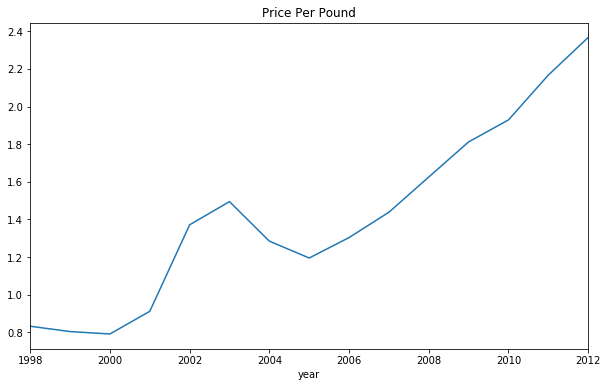

In [45]:
plt.figure(figsize=(10,6))
df_by_year['priceperlb'].plot()
plt.title('Price Per Pound')

plt.show()

##### Wow, total honey production has declined over time, and the price per pund has gone way up. 

#### Let's see how the different variables are related.

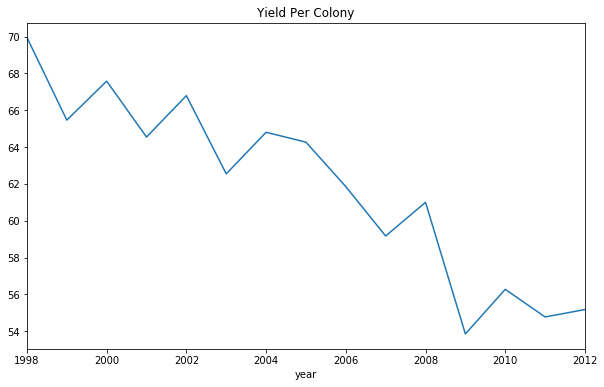

In [72]:
plt.figure(figsize=(10,6))
df_by_year['yieldpercol'].plot()
plt.title('Yield Per Colony')

plt.show()

In [124]:
(df_by_year.loc[1998, 'yieldpercol'] - df_by_year.loc[2012, 'yieldpercol']) / len(df_by_year)

0.98523255813953481

The yield per colony is decreasing by .98 pounds every year.

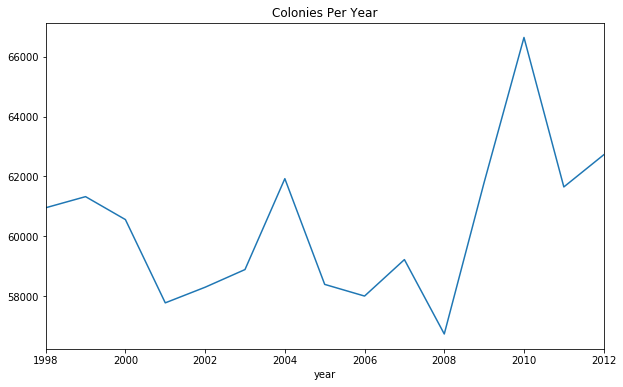

In [70]:
plt.figure(figsize=(10,6))
df_by_year['numcol'].plot()
plt.title('Colonies Per Year')

plt.show()

In [11]:
df_by_year

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
year,,,,,,
1998,60953.488372,69.953488,5.105093e+06,1.873605e+06,0.832558,3.397465e+06
1999,61325.581395,65.465116,4.706674e+06,1.823023e+06,0.804186,2.875744e+06
2000,60558.139535,67.581395,5.106000e+06,1.975721e+06,0.791395,3.059721e+06
2001,57772.727273,64.545455,4.221545e+06,1.471909e+06,0.911818,3.006409e+06
2002,58295.454545,66.795455,3.892386e+06,8.903864e+05,1.371364,5.165955e+06
2003,58886.363636,62.545455,4.122091e+06,9.231591e+05,1.494773,5.729068e+06
2004,61926.829268,64.804878,4.456805e+06,1.487341e+06,1.284634,4.812366e+06
2005,58390.243902,64.268293,4.243146e+06,1.516756e+06,1.195122,3.921780e+06
2006,58000.000000,61.853659,3.761902e+06,1.469146e+06,1.303659,3.851805e+06


In [4]:
df_grouped_by_year = df.groupby('year').agg('sum').reset_index()

In [6]:
df_grouped_by_year.head()

,year,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,1998,2621000.0,3008,219519000.0,80565000.0,35.80,146091000.0
1,1999,2637000.0,2815,202387000.0,78390000.0,34.58,123657000.0
2,2000,2604000.0,2906,219558000.0,84956000.0,34.03,131568000.0
3,2001,2542000.0,2840,185748000.0,64764000.0,40.12,132282000.0
4,2002,2565000.0,2939,171265000.0,39177000.0,60.34,227302000.0


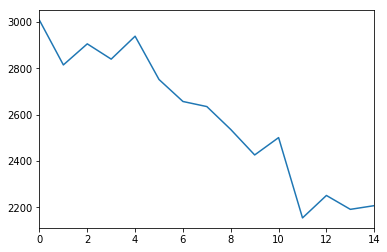

In [8]:
df_grouped_by_year['yieldpercol'].plot()

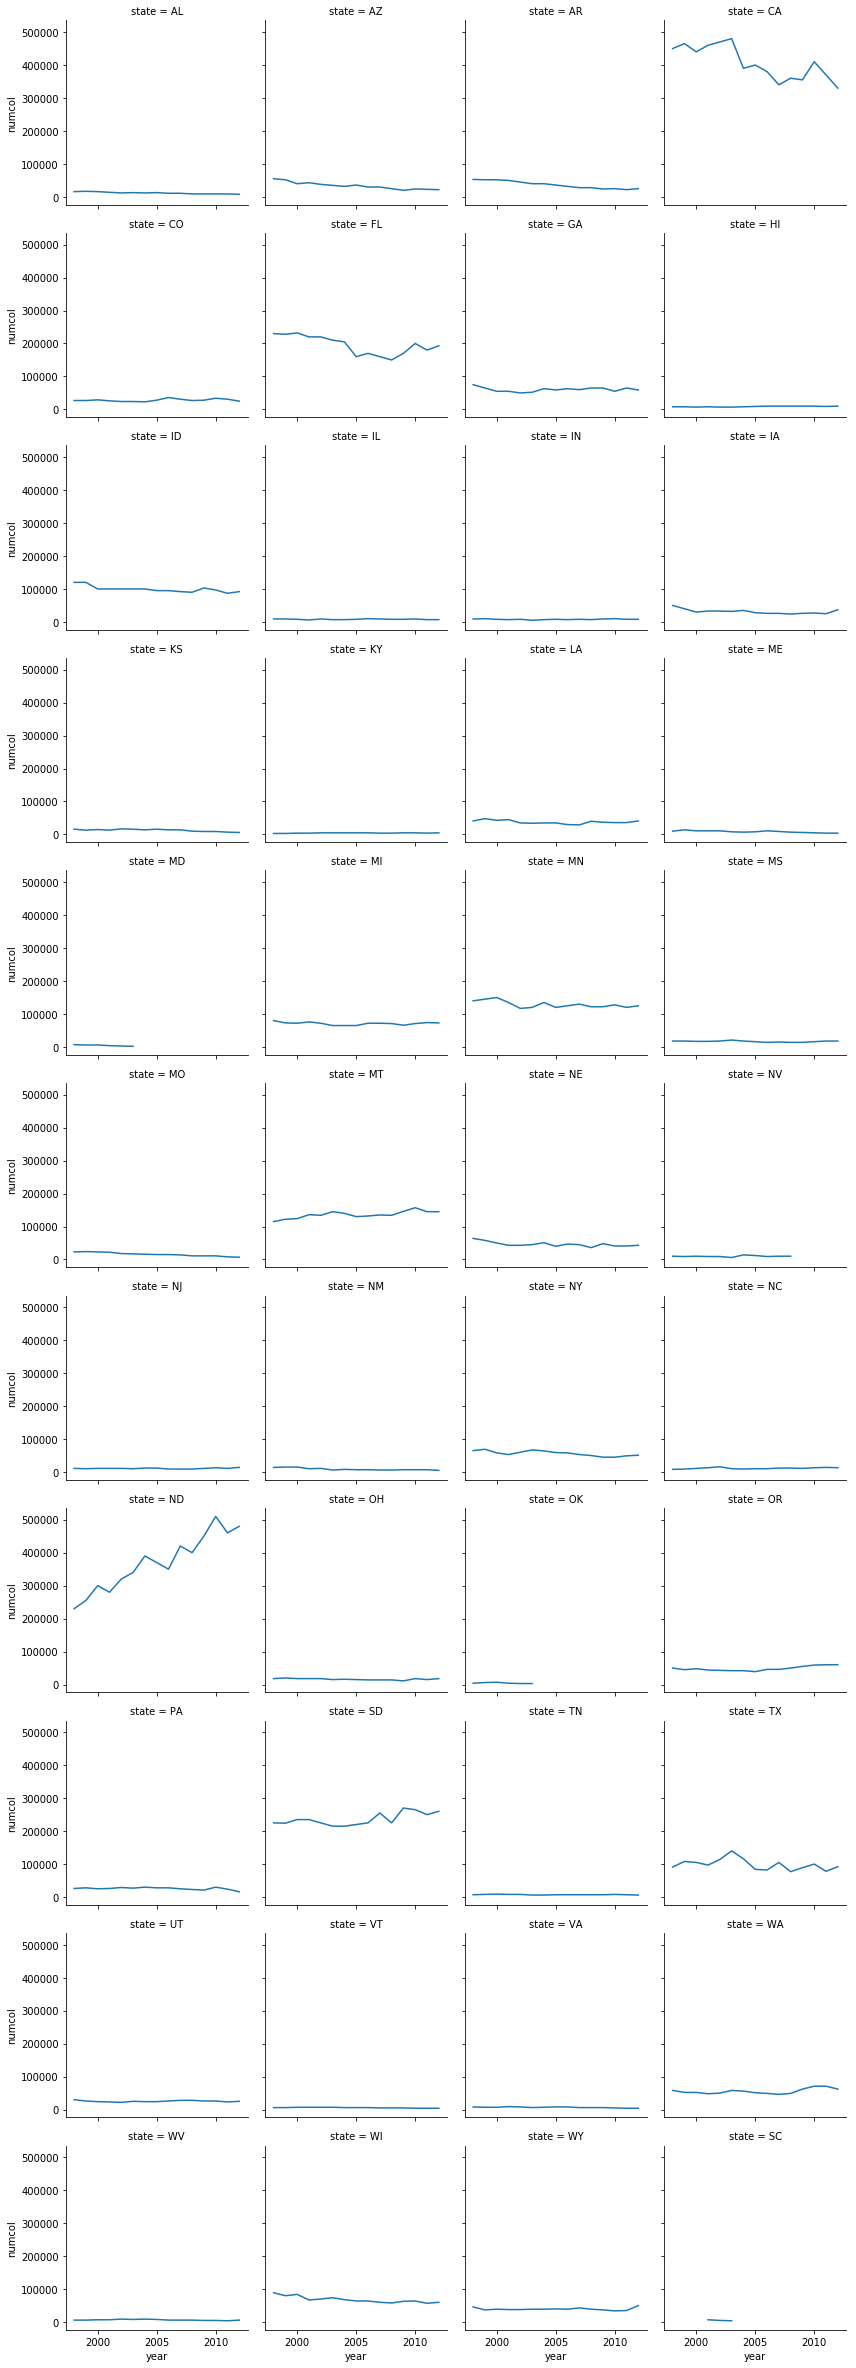

In [92]:
states = df['state'].unique()
g = sns.FacetGrid(df, col="state", col_wrap=4, size=3)
g.map(plt.plot, "year", "numcol", linestyle='-')

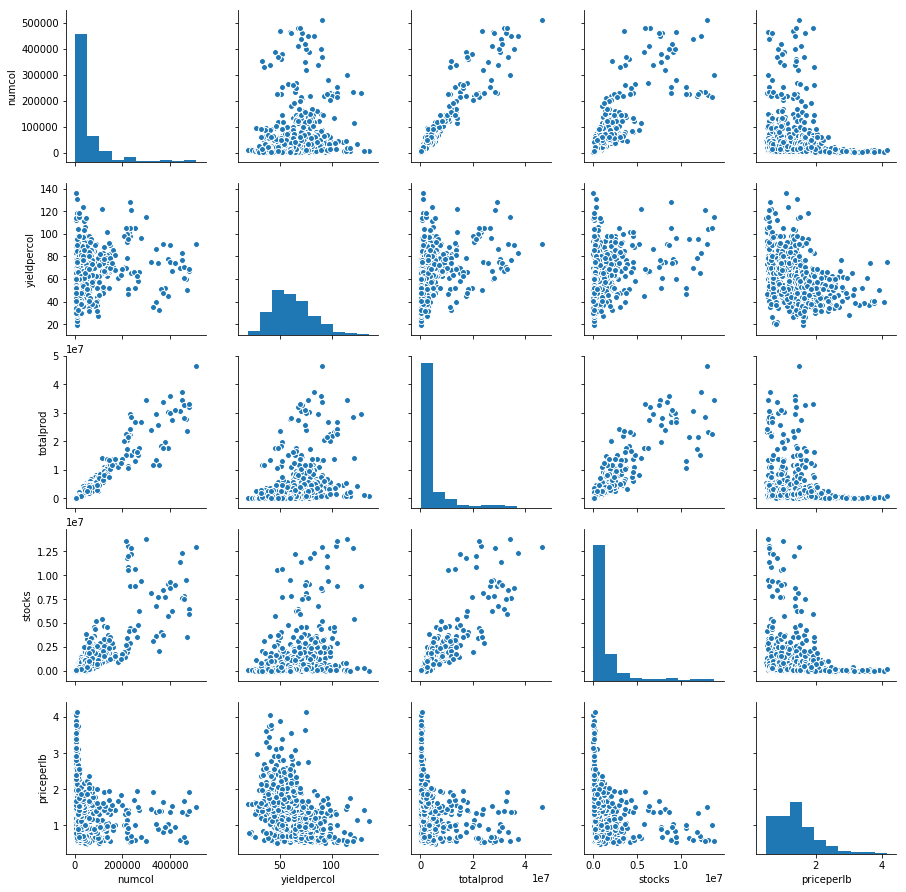

In [54]:
sns.pairplot(df[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb']])
plt.show()

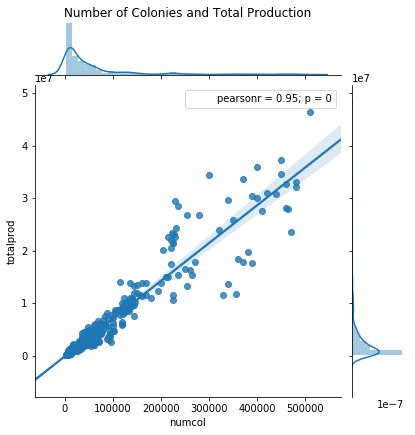

In [57]:
plt.figure(figsize=(8,8))
sns.jointplot(y="totalprod", x="numcol",kind="reg", data=df)
plt.title('Number of Colonies and Total Production', y=1.2)
plt.show()

# The Problem

Honey production in the United States has been gradually declining, causing the price of honey to greatly increase, and forcing the country to be more reliant on importing honey. The data shows that the yield per colony is declining by an average of .98 lbs. per year.

https://naldc.nal.usda.gov/download/CAT87210713/PDF

Some bee farmers have had success increasing yield with a two queen method. It involves adding a 2nd queen to the colony, putting up a partition to keep the two queens separate.   

# Experimental Design

**Hypothesis:** Adding a 2nd queen to the bee colonies will increase yield per colony. 

**Sample:** Throughout the country, 200 honey farms will be selected to be part of the experiment. Each farm selected will have at least 2000 colonies so the total sample size will be at least 400,000 colonies. The 200 farms will be randomly assigned into one of two groups. The treatment group will be farms where a 2nd queen will be added to each of the colonies. The control group will be farms where there is only one queen per colony. 

**Key Metrics:** The key metric will be if the yield per colony can increase by 2.5 lbs per year.

**Secondary Metrics:** The secondary metrics will be number of colonies.

**Duration:** The experiment will run for 36 months.
# Rollout Plan


## 1-12 Months
There will be a 30% initial roll out for the first 12 months where the first 30 farms will have the 2 queen method implemented. At that point the key and secondary metrics will be recorded. If the yield per colony has stabilized or has decreased no less than by .98 lbs then the experiment will continue.


## 12-24 Months
At the 12 month mark if the experiment is continuing, the remaining 60 farms will have the 2 queen method implemented. At 24 months, the key and secondary metrics will be recorded.

## 24-36 Months
The the end of the 36 months, the key and secondary metrics will be recorded.

# Evaluation

At the end of the 3 years , if the yield per colony has increased by 2.5 lbs per year the null hypothesis that adding a 2nd queen will not increase yield per colony can be rejected. 